In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import glob
from sklearn.preprocessing import normalize
from sklearn.utils import shuffle
sns.set(context='paper',font_scale=2)
palette = sns.plt.cm.gray_r
# set masked values to plot red
palette.set_bad('r', 1.0)
%matplotlib inline
#%matplotlib notebook
import warnings
warnings.filterwarnings("ignore")

In [60]:
data_files = glob.glob("HH1333134985_pks1613-586.1822.ms_all_data_baseline0and6.csv")

In [61]:
names = ["d_p","tC_mean","tp_mean",'t_skew','t_kurtosis','t_cumsumx','t_sumvalues'
         ,'t_slope','t_per25','t_per75','t_var',"fC_mean","fp_mean",'f_skew'
         ,'f_kurtosis','f_cumsumx','f_sumvalues','f_slope','f_per25','f_per75','f_var']
target_names = ['Not RFI','RFI']

In [62]:
data = pd.DataFrame.from_csv(data_files[0])
#data = shuffle(normalize(data,norm='l2'))
data.head(5)

,ant1,ant2,d_p,fC_mean,f_cumsumx,f_kurtosis,f_per25,f_per75,f_skew,f_slope,...,tC_mean,t_cumsumx,t_kurtosis,t_per25,t_per75,t_skew,t_slope,t_sumvalues,t_var,tp_mean
0,0,6,0.051648,0.114021,49.008190,4.124999,0.000721,0.001379,2.474874,-0.091838,...,0.098194,0.725559,-1.029962,0.042859,0.131927,0.793813,-8.688176,0.725559,0.002477,0.080618
1,0,6,0.175117,0.114021,0.853624,0.619544,0.066073,0.103892,1.221862,-30.555029,...,0.098194,0.725559,-1.029962,0.042859,0.131927,0.793813,-8.688176,0.725559,0.002477,0.080618
2,0,6,0.044047,0.113871,49.006268,4.124999,0.000334,0.001876,2.474873,-0.091842,...,0.098194,0.725559,-1.029962,0.042859,0.131927,0.793813,-8.688176,0.725559,0.002477,0.080618
3,0,6,0.131927,0.113871,0.849568,0.855774,0.071162,0.107057,1.268444,-0.372921,...,0.098194,0.725559,-1.029962,0.042859,0.131927,0.793813,-8.688176,0.725559,0.002477,0.080618
4,0,6,0.034484,0.114011,49.007118,4.124999,0.000581,0.001119,2.474874,-0.091841,...,0.098194,0.725559,-1.029962,0.042859,0.131927,0.793813,-8.688176,0.725559,0.002477,0.080618


In [63]:
HH_X0 = data
for i in range(10):
    HH_X0 = shuffle(HH_X0)
HH_X0_not = HH_X0[HH_X0["rfi"]==0]
HH_X0_is = HH_X0[HH_X0["rfi"]==1]
data1 = pd.concat([HH_X0_not[:len(HH_X0_is)],HH_X0_is], ignore_index=True)
del HH_X0_not
del HH_X0_is
del HH_X0

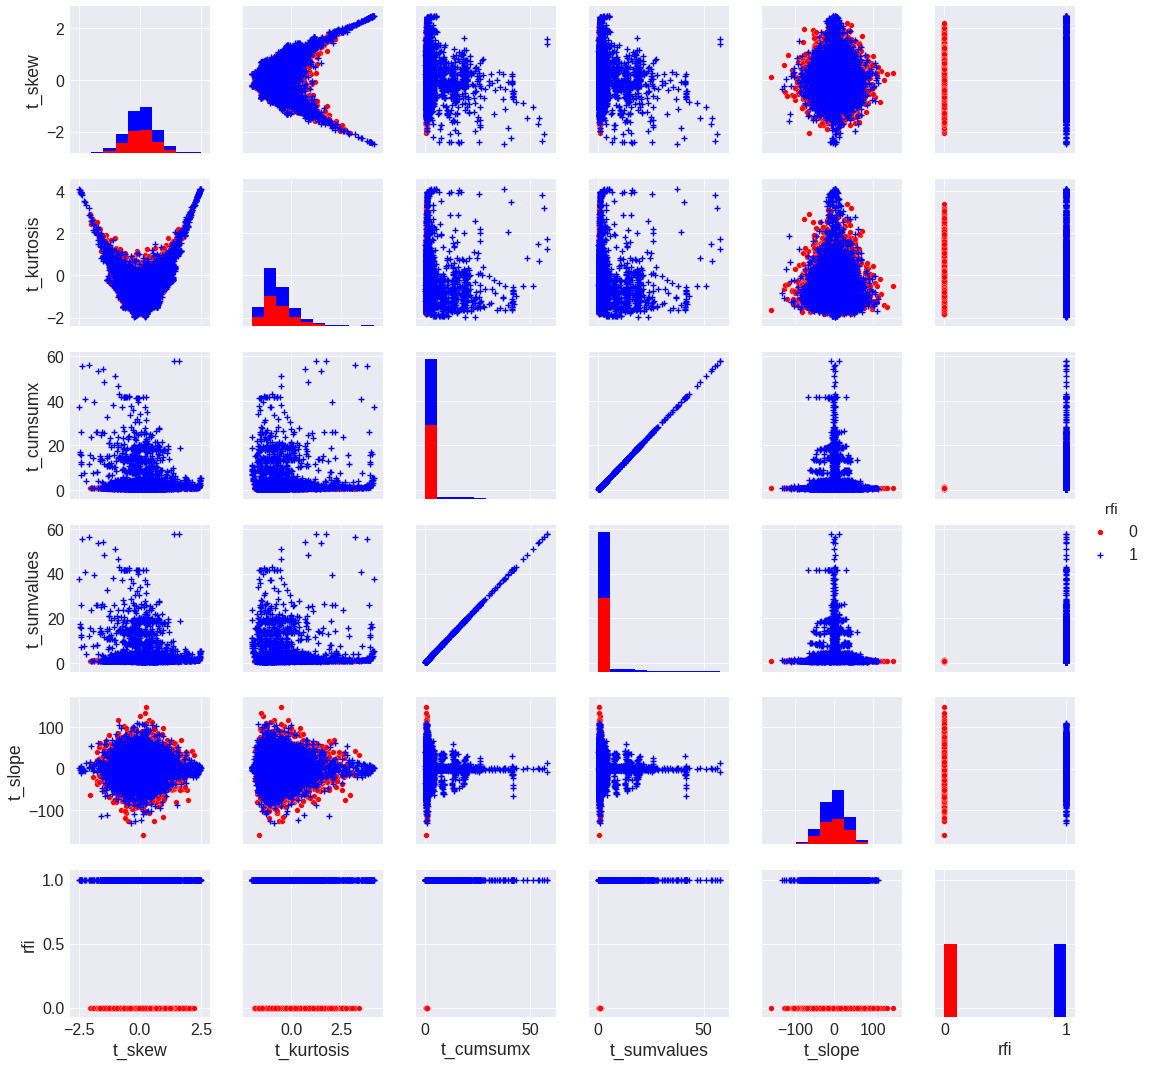

In [74]:
sns.pairplot(data1[names[3:8]+['rfi']][:], hue="rfi",markers=['o','+'],palette=['r','b'])
sns.plt.savefig("sub_feature_space.eps",format='eps', dpi=200)
